In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# สำรวจข้อมูลในไฟล์ 01_cvocp_user_course_timing_masked.csv 

ซึ่งไฟล์ดังกล่าวเป็น log ของผู้ใช้งานในช่วงเวลาที่เก็บข้อมูล



In [7]:
specific_direction="/content/drive/My Drive/20191112_CUMOOC_Data/Raw Data/"
cvocp_user_course_timing_masked=pd.read_csv(specific_direction+'01_cvocp_user_course_timing_masked.csv')

In [ ]:
cvocp_user_course_timing_masked.head()

,record_id,cv_uid,cv_cid,action_type,assoc_id,assoc_id2,timestamp
0,1,KP0XGECF1SGVOS2O24VF,UMF4ZAMAJ3UAKSY5URJR,quiz_submitted,JMYCQPQ9ZCPXEEEMSHIH,SRGWN4LOSQEK8A51ENFQ,1530413688
1,2,KP0XGECF1SGVOS2O24VF,UMF4ZAMAJ3UAKSY5URJR,quiz_submitted,JMYCQPQ9ZCPXEEEMSHIH,SRGWN4LOSQEK8A51ENFQ,1530413709
2,3,KP0XGECF1SGVOS2O24VF,UMF4ZAMAJ3UAKSY5URJR,quiz_submitted,JMYCQPQ9ZCPXEEEMSHIH,SRGWN4LOSQEK8A51ENFQ,1530413724
3,4,KP0XGECF1SGVOS2O24VF,UMF4ZAMAJ3UAKSY5URJR,quiz_submitted,JMYCQPQ9ZCPXEEEMSHIH,SRGWN4LOSQEK8A51ENFQ,1530413741
4,5,KH8UA5P183ESRY8BQSNP,7M978UYOQ7J2A0EGDK3D,quiz_opened,83PK3M4EQRNVOPDASXCL,7LSY9RBX6NM0NX4RC4RY,1530413927


In [ ]:
cvocp_user_course_timing_masked.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1049508 entries, 0 to 1049507
Data columns (total 7 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   record_id    1049508 non-null  int64 
 1   cv_uid       1049508 non-null  object
 2   cv_cid       1049508 non-null  object
 3   action_type  1049508 non-null  object
 4   assoc_id     1049508 non-null  object
 5   assoc_id2    1049508 non-null  object
 6   timestamp    1049508 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 56.0+ MB


In [ ]:
set_of_uid_cvocp_user_course_timing_masked = cvocp_user_course_timing_masked.cv_uid.unique()
cvocp_user_course_timing_masked.cv_uid.describe()

count                  1049508
unique                   44448
top       Z68LN9VLZK2BGCRPYMP7
freq                      1607
Name: cv_uid, dtype: object

In [ ]:
set_of_cid_cvocp_user_course_timing_masked = cvocp_user_course_timing_masked.cv_cid.unique()
cvocp_user_course_timing_masked.cv_cid.describe()

count                  1049508
unique                     133
top       FC6VM7RQT38Z0ZI9M6W9
freq                     77948
Name: cv_cid, dtype: object

In [ ]:
print("There are seven action types ",cvocp_user_course_timing_masked.action_type.unique())

There are seven action types  ['quiz_submitted' 'quiz_opened' 'completed_intime' 'enrolled'
 'completed_late' 'quiz_timer_started' 'quiz_timer_out']


In [ ]:
starting_timestamp = min(cvocp_user_course_timing_masked.timestamp)
ending_timestamp = max(cvocp_user_course_timing_masked.timestamp)
print("Starting timestamp is ",starting_timestamp,"\nEnding timestamp is ",ending_timestamp)
print("The period of data collecting is ",(ending_timestamp-starting_timestamp)/(60*60*24)," days")

Starting timestamp is  1530413688 
Ending timestamp is  1551348939
The period of data collecting is  242.30614583333335  days


# สำรวจข้อมูลในไฟล์ 02_cvocp_user_test_score_masked.csv


In [ ]:
cvocp_user_test_score_masked = pd.read_csv(specific_direction+"02_cvocp_user_test_score_masked.csv")

In [ ]:
cvocp_user_test_score_masked.head()

,user_test_score_id,cv_uid,test_nid,sub_id,point,total
0,1,GEW2S6U24ZMJTSJLEPTK,EVYPCWEHD3NO60SVF2DD,ZW146UB6QZPD643Y4FJ3,2,2
1,2,WCB8KSCK643JQCORSFQ2,R2QG06ZY6NX9FS2HMAS5,0KL8GRMBK2PLB1TZR515,18,20
2,3,IGUC7NX29Z9WC7989OB0,6VZM0HTL86TV99POT26E,PLRTX6EWY6IJ2N0E138W,14,20
3,4,OLDI3GBOISKBC31PFSE8,R2QG06ZY6NX9FS2HMAS5,2R8GFDQPRYK2VNKLSIFW,17,20
4,5,XQJHIUGB1ZY6GX5PYLF6,717D9JTDZT13NQ79YP66,TP0X7W55O4MHUOSQKI3B,1,2


In [ ]:
cvocp_user_test_score_masked.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375140 entries, 0 to 375139
Data columns (total 6 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   user_test_score_id  375140 non-null  int64 
 1   cv_uid              375140 non-null  object
 2   test_nid            375140 non-null  object
 3   sub_id              375140 non-null  object
 4   point               375140 non-null  int64 
 5   total               375140 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 17.2+ MB


In [ ]:
cvocp_user_test_score_masked.cv_uid.describe()

count                   375140
unique                   45830
top       9M0TARRH6G8WPX3W5YOA
freq                       303
Name: cv_uid, dtype: object

In [ ]:
print((cvocp_user_test_score_masked.point/cvocp_user_test_score_masked.total).describe())

count    374892.000000
mean          0.839285
std           0.241996
min           0.000000
25%           0.700000
50%           1.000000
75%           1.000000
max           1.000000
dtype: float64


# สำรวจข้อมูลในไฟล์ 03_cvocp_course_masked.csv

In [ ]:
cvocp_course_masked = pd.read_csv(specific_direction+"03_cvocp_course_masked.csv")
cvocp_course_masked.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   cv_cid             175 non-null    object
 1   course_title       175 non-null    object
 2   course_no          175 non-null    object
 3   year               175 non-null    int64 
 4   semester           175 non-null    int64 
 5   instructor_string  159 non-null    object
 6   course_start       175 non-null    int64 
 7   course_end         175 non-null    int64 
 8   reg_start          175 non-null    int64 
 9   reg_end            175 non-null    int64 
 10  roster_limit       175 non-null    int64 
 11  reg_workflow       175 non-null    object
 12  course_type        175 non-null    object
 13  status             175 non-null    int64 
dtypes: int64(8), object(6)
memory usage: 19.3+ KB


In [ ]:
cvocp_course_masked.head()

,cv_cid,course_title,course_no,year,semester,instructor_string,course_start,course_end,reg_start,reg_end,roster_limit,reg_workflow,course_type,status
0,USIS5STDNOBQGGHXDDG7,การควบคุมยาสูบ รุ่นที่ 4,TRC.2016,2016,1,NaN,0,0,0,0,45,invited_selfreg,selfpace,1
1,ODRCRDFROFTNYRC0PQU2,Survival Thai (2016),CU.MOOC.0001,2016,2,NaN,1483491600,1496249999,1483491600,1485881999,14,invited_selfreg,selfpace,1
2,9W16HUAN3F0LB16BN1QC,การควบคุมยาสูบ รุ่นที่ 5,TRC.ELearning,2017,1,NaN,1501779600,1528736399,0,0,50,purchase_to_enroll,weekly,1
3,NTFBS3C5O5HPWTX9B8YJ,ภาษาอาหรับในชีวิตประจำวัน,CU.MOOC.0002,2017,1,อ. ดร.ทรงศักดิ์ หมัดสะและ,1504803600,1509469199,1504803600,1508086799,100,purchase_to_enroll,selfpace,1
4,P074WP7NLCCMPJ200PE8,การทำความเข้าใจงบการเงิน,CU.MOOC.0003,2017,1,ผศ. ดร.พิมพ์พนา ปีตธวัชชัย,1504803600,1509469199,1504803600,1508086799,2000,free_selfreg,selfpace,1


In [ ]:
print("The three types of reg_workflow ",cvocp_course_masked.reg_workflow.unique())
print("The two types of course_type ",cvocp_course_masked.course_type.unique())

The three types of reg_workflow  ['invited_selfreg' 'purchase_to_enroll' 'free_selfreg']
The two types of course_type  ['selfpace' 'weekly']


In [ ]:
print(cvocp_course_masked.status.value_counts())

1    174
0      1
Name: status, dtype: int64


In [ ]:
print("The cv_cid s is in 01_cvocp_user_course_timing_masked.csv")
cvocp_course_masked.cv_cid.map(lambda cid : cid in set_of_cid_cvocp_user_course_timing_masked).value_counts()

The cv_cid s is in 01_cvocp_user_course_timing_masked.csv


True     133
False     42
Name: cv_cid, dtype: int64

# สำรวจข้อมูลในไฟล์ 04_courseville_course_poster_masked


In [ ]:
courseville_course_poster_masked = pd.read_csv(specific_direction+"04_courseville_course_poster_masked.csv")
courseville_course_poster_masked.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175 entries, 0 to 174
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   cv_cid              175 non-null    object
 1   course_pretitle     175 non-null    object
 2   course_title        174 non-null    object
 3   course_description  155 non-null    object
dtypes: object(4)
memory usage: 5.6+ KB


In [ ]:
courseville_course_poster_masked.head()

,cv_cid,course_pretitle,course_title,course_description
0,USIS5STDNOBQGGHXDDG7,TRC.2016 (2016/1),การควบคุมยาสูบ รุ่นที่ 4,NaN
1,ODRCRDFROFTNYRC0PQU2,CU.MOOC.0001 (2016/2),Survival Thai,<p>This <strong>Survival Thai</strong> course ...
2,9W16HUAN3F0LB16BN1QC,TRC.ELearning (2017/1),การควบคุมยาสูบ รุ่นที่ 5,NaN
3,NTFBS3C5O5HPWTX9B8YJ,CU.MOOC.0002 (2017/1),ภาษาอาหรับในชีวิตประจำวัน,รายวิชาภาษาอาหรับในชีวิตประจำวัน จะเป็นการศึกษ...
4,P074WP7NLCCMPJ200PE8,CU.MOOC.0003 (2017/1),การทำความเข้าใจงบการเงิน,รายวิชาการทำความเข้าใจงบการเงิน จะเป็นการศึกษา...


# สำรวจข้อมูลในไฟล์ 05_cvocp_user_info_masked.csv


In [ ]:
cvocp_user_info_masked = pd.read_csv(specific_direction+"05_cvocp_user_info_masked.csv")
cvocp_user_info_masked.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51036 entries, 0 to 51035
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   cv_uid       51036 non-null  object 
 1   education    51035 non-null  object 
 2   occupation   51035 non-null  object 
 3   gender       51035 non-null  object 
 4   yearofbirth  51035 non-null  float64
 5   residence    51035 non-null  object 
dtypes: float64(1), object(5)
memory usage: 2.3+ MB


In [ ]:
cvocp_user_info_masked.head()

,cv_uid,education,occupation,gender,yearofbirth,residence
0,KH8UA5P183ESRY8BQSNP,Above Bachelor Degree,Govenment/State Enterprise Employee,Male,1976.0,Bangkok
1,TFH3B91W13YZ8ZUJJC38,Above Bachelor Degree,Other,Male,1987.0,Bangkok
2,D3QMUHBVM4YI6MWUAPZL,Bachelor Degree,Other,Male,1989.0,Bangkok
3,7MG8V8F2J9AF2Y0PS2TZ,Above Bachelor Degree,Private Sector Employee,Male,1989.0,Bangkok
4,S4MFNN7NXR87BMQHYTN9,Above Bachelor Degree,Govenment/State Enterprise Employee,Male,1964.0,Bangkok


In [ ]:
print("There are three types of education levels")
print(cvocp_user_info_masked.education.value_counts())

There are three types of education level
Bachelor Degree          25981
Below Bachelor Degree    13442
Above Bachelor Degree    11612
Name: education, dtype: int64


In [ ]:
print("There are three types of occupations")
print(cvocp_user_info_masked.occupation.value_counts())

There are three types of occupations
Private Sector Employee                11121
Student                                10310
Govenment/State Enterprise Employee    10067
College Student                         6757
Other                                   5601
Business Owner/Freelance                4812
Unemployed                              2168
Retiree                                  198
Employee                                   1
Name: occupation, dtype: int64


In [ ]:
print("There are three types of genders")
print(cvocp_user_info_masked.gender.value_counts())

There are three types of genders
Female         29356
Male           18760
Unspecified     2919
Name: gender, dtype: int64


The distribution graph of user's year of birth


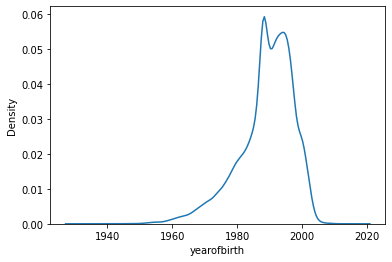

In [ ]:
print("The distribution graph of user's year of birth")
sns.kdeplot(data = cvocp_user_info_masked['yearofbirth'] )

In [ ]:
print(cvocp_user_info_masked.residence.value_counts())

Bangkok                          34289
Central Region, Thailand          3882
Northern Region, Thailand         3404
Northeastern Region, Thailand     3004
Southern Region, Thailand         2742
Eastern Region, Thailand          2344
Outside of Thailand                945
Western Region, Thailand           425
Name: residence, dtype: int64


In [ ]:
cvocp_user_info_masked.cv_uid.map(lambda uid : uid in set_of_uid_cvocp_user_course_timing_masked).value_counts()

True     35385
False    15651
Name: cv_uid, dtype: int64

# สำรวจข้อมูลในไฟล์ 06_courseville_content_video_masked.csv

In [ ]:
courseville_content_video_masked = pd.read_csv(specific_direction+"06_courseville_content_video_masked.csv")
courseville_content_video_masked.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2683 entries, 0 to 2682
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   v_id             2683 non-null   object
 1   cv_cid           2683 non-null   object
 2   video_source_id  2683 non-null   object
dtypes: object(3)
memory usage: 63.0+ KB


In [ ]:
courseville_content_video_masked.head()

,v_id,cv_cid,video_source_id
0,ZIDHTXVVXSQZX0ZH49CN,USIS5STDNOBQGGHXDDG7,VB79884A9OC2KYK6H3WB
1,0UYCENV1YISTZ2YP3MB8,USIS5STDNOBQGGHXDDG7,VB79884A9OC2KYK6H3WB
2,2MBAIA1WVYH7W6N91U9O,USIS5STDNOBQGGHXDDG7,VB79884A9OC2KYK6H3WB
3,MCTF3W40S5TKQD9QA8W9,USIS5STDNOBQGGHXDDG7,VB79884A9OC2KYK6H3WB
4,A2C3H4LCS2QEGJUIBNSP,USIS5STDNOBQGGHXDDG7,VB79884A9OC2KYK6H3WB


# สำรวจข้อมูลในไฟล์ 07_cvdlit_watch_log_masked.csv


In [ ]:
cvdlit_watch_log_masked = pd.read_csv(specific_direction+"07_cvdlit_watch_log_masked.csv")
cvdlit_watch_log_masked.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41801122 entries, 0 to 41801121
Data columns (total 5 columns):
 #   Column           Dtype  
---  ------           -----  
 0   cv_uid           object 
 1   video_source_id  object 
 2   cliptime         float64
 3   timestamp        int64  
 4   state            int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.6+ GB


In [ ]:
cvdlit_watch_log_masked.head()

,cv_uid,video_source_id,cliptime,timestamp,state
0,KH8UA5P183ESRY8BQSNP,BZV2DEBTCWJQZ9XJSTUM,0.580,1479429903,1
1,KH8UA5P183ESRY8BQSNP,BZV2DEBTCWJQZ9XJSTUM,5.581,1479429908,1
2,KH8UA5P183ESRY8BQSNP,BZV2DEBTCWJQZ9XJSTUM,10.580,1479429913,1
3,KH8UA5P183ESRY8BQSNP,BZV2DEBTCWJQZ9XJSTUM,15.580,1479429918,1
4,SW65BE746DCUUM2H32EO,BZV2DEBTCWJQZ9XJSTUM,0.110,1479440525,1
